🔹 Linear SVM Accuracy: 0.9005847953216374
🔹 RBF SVM Accuracy: 0.9064327485380117
🔹 Best Parameters (RBF): {'C': 1, 'gamma': 0.1}
🔹 Best CV Score: 0.8993354430379747
🔹 Cross-validation Scores: [0.85964912 0.88596491 0.89473684 0.93859649 0.90265487]

📊 Classification Report (Best RBF SVM):
               precision    recall  f1-score   support

           0       0.91      0.84      0.88        63
           1       0.91      0.95      0.93       108

    accuracy                           0.91       171
   macro avg       0.91      0.90      0.90       171
weighted avg       0.91      0.91      0.91       171



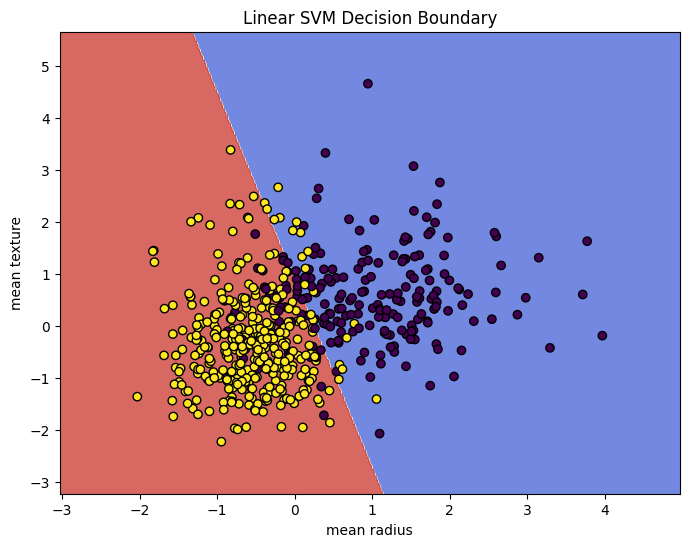

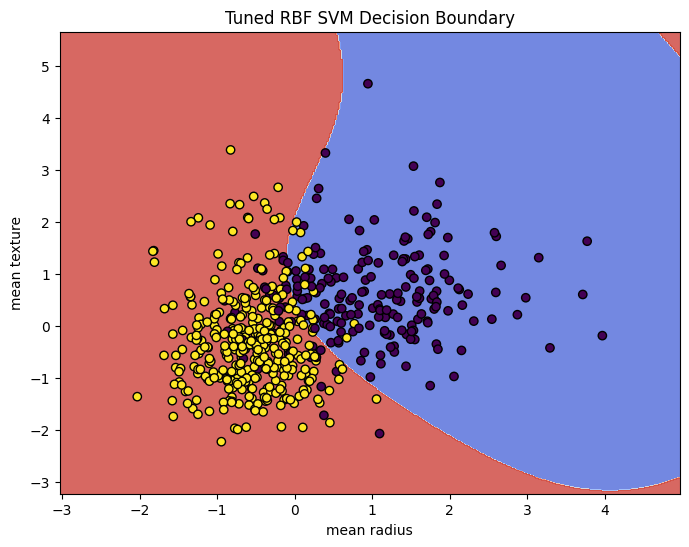

In [3]:
#  Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

#  1. Load dataset
data = load_breast_cancer()
X_full = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

#  2. Select 2 features for 2D visualization (for decision boundary)
X = X_full[['mean radius', 'mean texture']]

# 3. Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#  4. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

#  5. Train SVM with Linear and RBF Kernels
svm_linear = SVC(kernel='linear')
svm_rbf = SVC(kernel='rbf')

svm_linear.fit(X_train, y_train)
svm_rbf.fit(X_train, y_train)

#  6. Hyperparameter tuning for RBF kernel
param_grid = {'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01]}
grid = GridSearchCV(SVC(kernel='rbf'), param_grid, refit=True, verbose=0, cv=5)
grid.fit(X_train, y_train)

# 7. Cross-validation and performance
linear_acc = svm_linear.score(X_test, y_test)
rbf_acc = svm_rbf.score(X_test, y_test)
best_params = grid.best_params_
cv_score = grid.best_score_
cv_scores = cross_val_score(grid.best_estimator_, X_scaled, y, cv=5)

#  8. Print reports
print("🔹 Linear SVM Accuracy:", linear_acc)
print("🔹 RBF SVM Accuracy:", rbf_acc)
print("🔹 Best Parameters (RBF):", best_params)
print("🔹 Best CV Score:", cv_score)
print("🔹 Cross-validation Scores:", cv_scores)
print("\n📊 Classification Report (Best RBF SVM):\n", classification_report(y_test, grid.predict(X_test)))

# 9. Function to plot decision boundaries
def plot_decision_boundary(model, X, y, title):
    h = .02  # step size
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.xlabel('mean radius')
    plt.ylabel('mean texture')
    plt.title(title)
    plt.show()

# 10. Plotting
plot_decision_boundary(svm_linear, X_scaled, y, "Linear SVM Decision Boundary")
plot_decision_boundary(grid.best_estimator_, X_scaled, y, "Tuned RBF SVM Decision Boundary")